In [19]:
# 📌 3. Priority Prediction - Model Training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os



In [20]:
# --------------------------------------------
# 1. Load Task Dataset
# --------------------------------------------
df = pd.read_csv("../data/task_data.csv")

# Fill missing values
df['description'] = df['description'].fillna("")
df['title'] = df.get('title', "Task")
df['title'] = df['title'].fillna("Task")



In [21]:
# --------------------------------------------
# 2. Combine Text Features
# --------------------------------------------
df['combined_text'] = df['title'] + " " + df['description']



In [22]:
# --------------------------------------------
# 3. TF-IDF Vectorization
# --------------------------------------------
vectorizer = TfidfVectorizer(max_features=48)
X = vectorizer.fit_transform(df['combined_text'])

# Save vectorizer
os.makedirs("../models", exist_ok=True)
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")



['../models/tfidf_vectorizer.pkl']

In [23]:
# --------------------------------------------
# 4. Encode Priority Labels
# --------------------------------------------
priority_encoder = LabelEncoder()
y = priority_encoder.fit_transform(df['priority'])

# Save encoder
joblib.dump(priority_encoder, "../models/priority_label_encoder.pkl")



['../models/priority_label_encoder.pkl']

In [24]:
# --------------------------------------------
# 5. Train-Test Split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



📊 Naive Bayes Report:

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.50      0.20      0.29         5
           2       0.50      0.78      0.61         9

    accuracy                           0.45        20
   macro avg       0.42      0.38      0.36        20
weighted avg       0.42      0.45      0.41        20

✅ Accuracy: 0.45


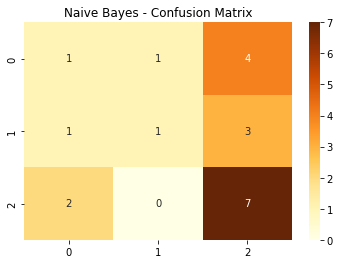

In [25]:
# =============================================
# 6. Naive Bayes Classifier
# =============================================
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("📊 Naive Bayes Report:\n")
print(classification_report(y_test, y_pred_nb))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_nb))

# Save model
joblib.dump(nb, "../models/priority_predictor_nb.pkl")

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap="YlOrBr", fmt='d')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()



📊 SVM Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.20      0.29         5
           2       0.47      0.89      0.62         9

    accuracy                           0.45        20
   macro avg       0.32      0.36      0.30        20
weighted avg       0.34      0.45      0.35        20

✅ Accuracy: 0.45


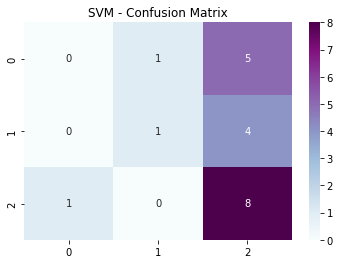

In [26]:
# =============================================
# 7. Support Vector Machine (SVM)
# =============================================
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("📊 SVM Report:\n")
print(classification_report(y_test, y_pred_svm))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_svm))

# Save model
joblib.dump(svm, "../models/priority_predictor_svm.pkl")

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="BuPu", fmt='d')
plt.title("SVM - Confusion Matrix")
plt.show()



C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 XGBoost Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.20      0.29         5
           2       0.47      0.89      0.62         9

    accuracy                           0.45        20
   macro avg       0.32      0.36      0.30        20
weighted avg       0.34      0.45      0.35        20

✅ Accuracy: 0.45


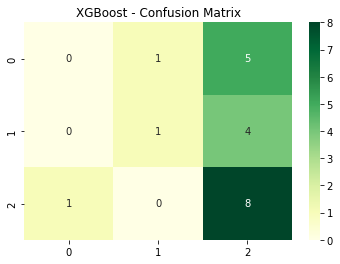

In [27]:
# =============================================
# 8. XGBoost Classifier (Optional)
# =============================================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("📊 XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Save model
joblib.dump(xgb, "../models/priority_predictor_xgb.pkl")

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap="YlGn", fmt='d')
plt.title("XGBoost - Confusion Matrix")
plt.show()
